## Import dependancies

In [1]:
# Import dependancies
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
from etherscan_py import etherscan_py
import plotly.express as px

In [2]:
# Loading .env containing our keys
load_dotenv()

True

In [3]:
# create variable for api key 
api_key = os.getenv('COVALENT_API_KEY')
type(api_key)

str

## Current value of ETH

In [4]:
# import dependancy
from etherscan_py import etherscan_py
client = etherscan_py.Client(os.getenv('ETHERSCAN_API'))

# Print current eth price and latest block height
eth_value = client.get_eth_price()
eth_value

2744.91

## Set variables

In [5]:
# Append url for our api
url = "https://api.covalenthq.com/v1"
chain_id = "/1"
azuki_address = "/0xED5AF388653567Af2F388E6224dC7C4b3241C544"
cryptopunks_address = "/0xb47e3cd837dDF8e4c57F05d70Ab865de6e193BBB"
BAYC_address = "/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D"
date_option = '/?quote-currency=USD&format=JSON&from=2017-01-01&to=2022-05-01'
page_option = '/transactions_v2/?quote-currency=USD&format=JSON&block-signed-at-asc=false&no-logs=false&page-number=0&page-size=1000'
api_option = "&key=" + api_key
api_no_option = '/?key=' + api_key

## 1. Azuki Daily Volume

In [6]:
# Create variables needed for owner data and add to url
historical_url = url + chain_id + "/nft_market/collection" + azuki_address + api_no_option

# Get request
azuki_historical_json = requests.get(historical_url).json()

# Convert historical json data to a dataframe and view data
azuki_df = pd.DataFrame(azuki_historical_json['data']['items'])

# Set index to date
azuki_df = azuki_df.set_index('opening_date')

# Create Volume dataframe
azuki_vol_df = pd.DataFrame(azuki_df, columns = ['volume_quote_day', 'unique_token_ids_sold_count_day']).sort_index()
azuki_vol_df.head()

volume_quote_day  unique_token_ids_sold_count_day
opening_date                                                   
2022-01-12          45941404.0                             2402
2022-01-13          25129178.0                             1318
2022-01-14         168151840.0                              470
2022-01-15           4408686.0                              499
2022-01-16         295638336.0                              368

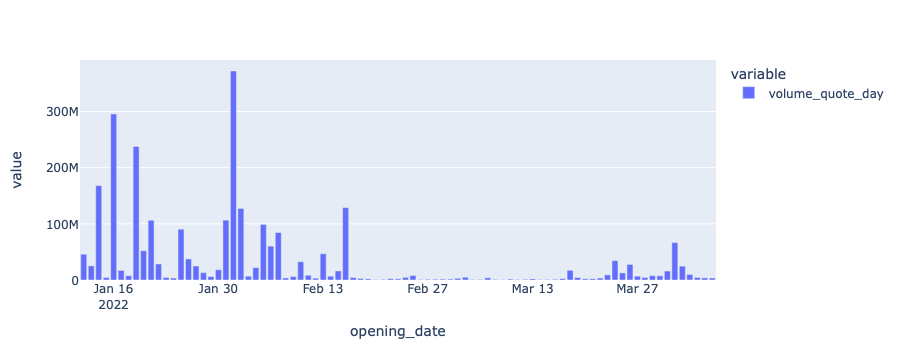

In [7]:
# Plot Volume quote per day
azuki_volume = azuki_vol_df['volume_quote_day'].astype(int)

# Plot Historical daily volume
px.bar(azuki_volume)

## 1. Azuki Historical transactions

In [8]:
# Quering the API for transaction data
azuki_tx_url = url + chain_id + "/address" + azuki_address + page_option + api_option 
azuki_tx = requests.get(azuki_tx_url).json()

# Convert transactions data to dataframe
azuki_tx_df = pd.DataFrame(azuki_tx['data']['items'], columns = ['to_address_label','fees_paid', 'value_quote','block_signed_at']).set_index('block_signed_at').sort_index()

azuki_tx_df.head()

to_address_label          fees_paid  \
block_signed_at                                                         
2022-05-02T18:17:42Z                          None   4032457234374283   
2022-05-02T18:19:31Z                          None   4694558910164695   
2022-05-02T18:20:51Z  Wyvern Exchange Contract (-)  19032560372597632   
2022-05-02T18:23:37Z                Gem: GemSwap 2  23287595086461398   
2022-05-02T18:23:55Z                          None  68916453007044960   

                        value_quote  
block_signed_at                      
2022-05-02T18:17:42Z       0.000000  
2022-05-02T18:19:31Z       0.000000  
2022-05-02T18:20:51Z   85775.895996  
2022-05-02T18:23:37Z  102931.075195  
2022-05-02T18:23:55Z       0.000000

## 1.a Azuki Historical Sales

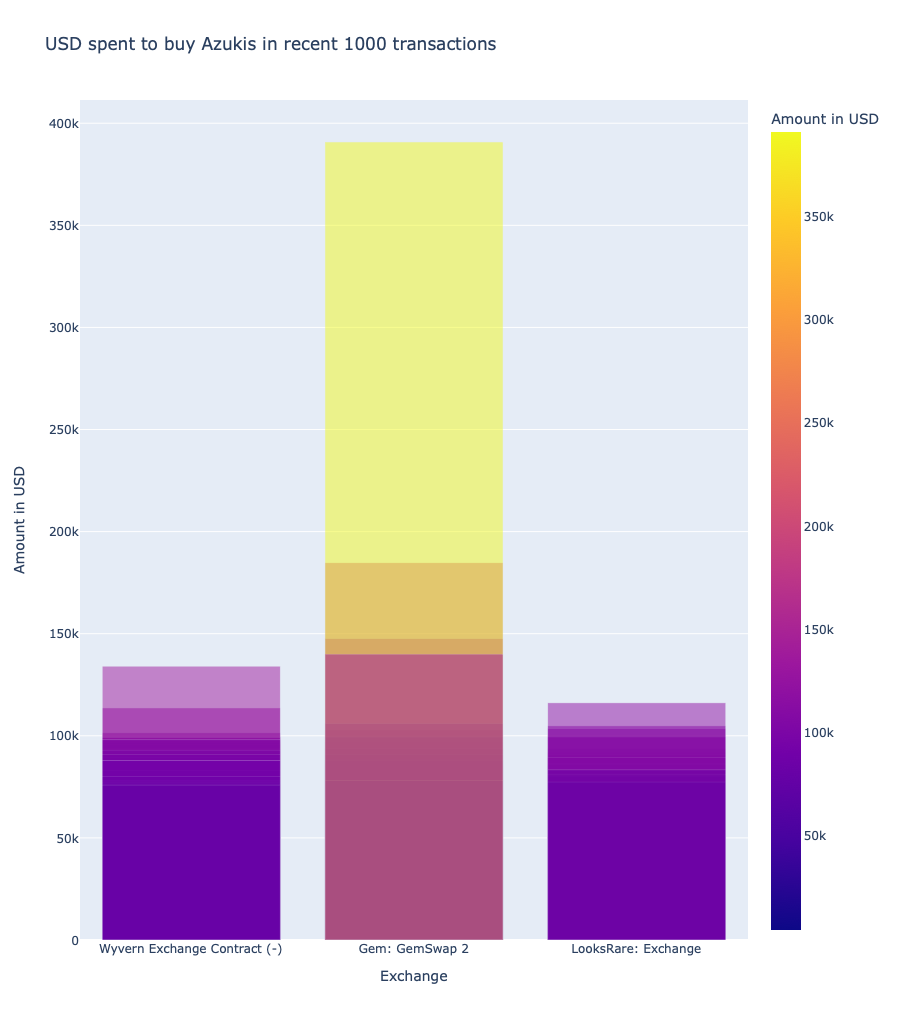

In [9]:
# Filter Through data for non null transactions
azuki_sales_df = azuki_tx_df[azuki_tx_df['value_quote'] != 0]
azuki_sales = azuki_sales_df[azuki_sales_df['to_address_label'].notnull()]

# Creating the plot using plotly express
azuki_fig = px.bar(azuki_sales, 
                   x='to_address_label',
                   y= 'value_quote',
                   color='value_quote',
                   height=1020,
                   width = 1000,
                   barmode='overlay',
                   labels={'value_quote':'Amount in USD', 'to_address_label': 'Exchange'},
                   title='USD spent to buy Azukis in recent 1000 transactions'
                  )
azuki_fig.show()

## 1.b Azuki transaction fees paid

<AxesSubplot:xlabel='block_signed_at', ylabel='value in USD'>

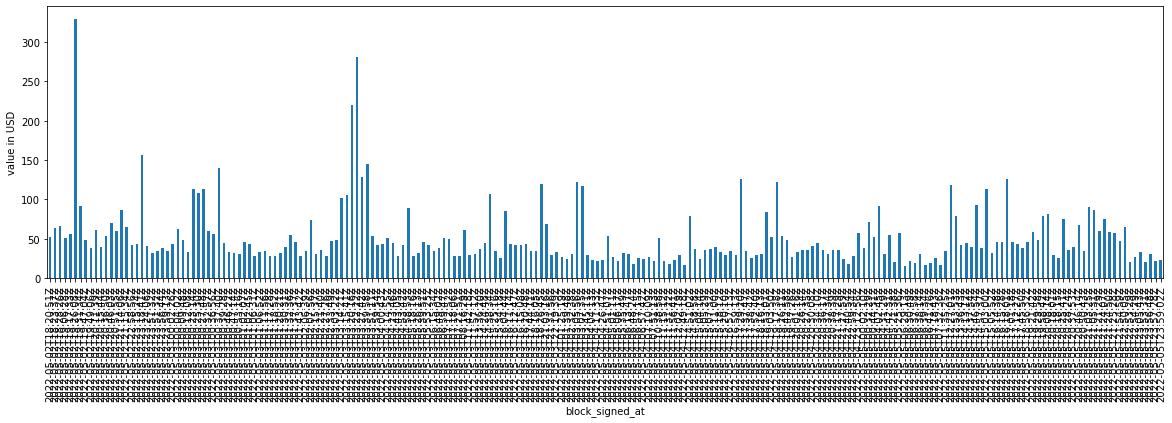

In [10]:
# Filter Through data for non null transactions
azuki_fees = azuki_sales_df['fees_paid'].astype(int)/10**18*eth_value

azuki_fees.plot.bar(rot = 90, figsize = (20,5), ylabel = 'value in USD')

## 2. Cryptopunks Daily Volume

In [11]:
# Create variables needed for owner data and append to url
cryptopunks_historical_url = url + chain_id + "/nft_market/collection" + cryptopunks_address + api_no_option

# Get request
cryptopunks_historical_json = requests.get(cryptopunks_historical_url).json()

# Convert historical json data to a dataframe and view data
cryptopunks_df = pd.DataFrame(cryptopunks_historical_json['data']['items'])

# Set index to date
cryptopunks_df = cryptopunks_df.set_index('opening_date')

# Create Volume dataframe
cryptopunks_vol_df = pd.DataFrame(cryptopunks_df, columns = ['volume_quote_day', 'unique_token_ids_sold_count_day']).sort_index()
cryptopunks_vol_df.head()

volume_quote_day  unique_token_ids_sold_count_day
opening_date                                                   
2017-06-23                 0.0                               19
2017-06-24                 0.0                               22
2017-06-25                 0.0                               11
2017-06-26                 0.0                               18
2017-06-27                 0.0                               35

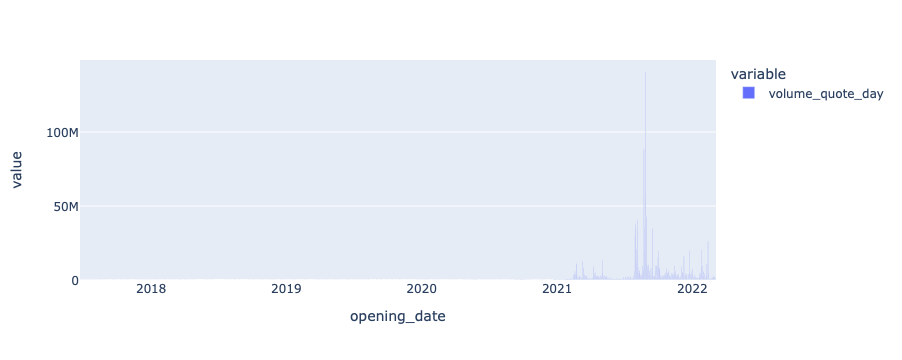

In [12]:
# Plot Volume quote per day
cryptopunks_volume = cryptopunks_vol_df['volume_quote_day'].astype(int)

# cryptopunks_volume.plot.line(figsize = (20,4))

px.bar(cryptopunks_volume)

## 2a Cryptopunks Historical transactions

In [13]:
# Quering the API for transaction data
cryptopunks_tx_url = url + chain_id + "/address" + cryptopunks_address + page_option + api_option 
cryptopunks_tx = requests.get(cryptopunks_tx_url).json()

# Convert transactions data to dataframe
cryptopunks_tx_df = pd.DataFrame(cryptopunks_tx['data']['items'], columns = ['to_address_label','fees_paid', 'value_quote','block_signed_at']).set_index('block_signed_at').sort_index()

cryptopunks_tx_df.head()

to_address_label          fees_paid  value_quote
block_signed_at                                                      
2022-04-27T17:20:09Z  CRYPTOPUNKS (Ͼ)   6381749930928020          0.0
2022-04-27T17:22:58Z             None  43183316315122830          0.0
2022-04-27T17:42:41Z  CRYPTOPUNKS (Ͼ)   5936112000000000          0.0
2022-04-27T17:46:26Z  CRYPTOPUNKS (Ͼ)   5901776729714157          0.0
2022-04-27T17:48:18Z             None  28932221174799876          0.0

## 2.a Cryptopunks Historical Sales

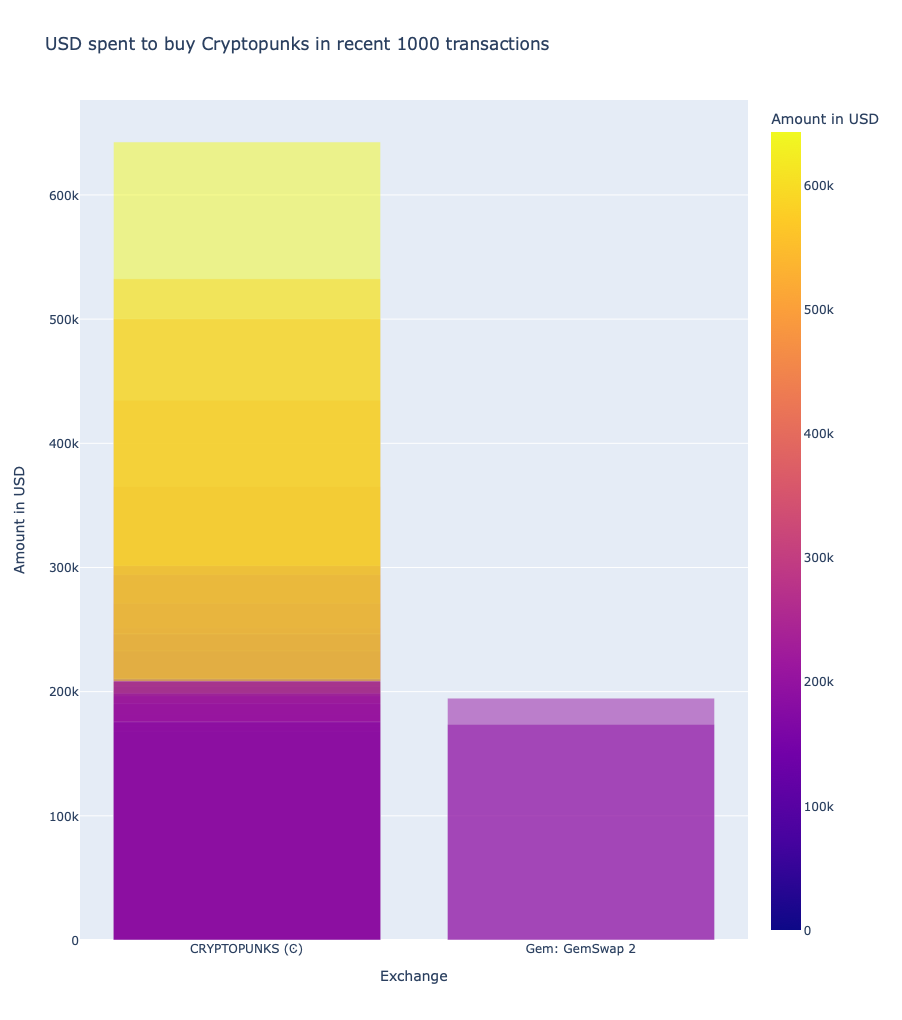

In [14]:
# Filter Through data for non null transactions
cryptopunks_sales_df = cryptopunks_tx_df[cryptopunks_tx_df['value_quote'] != 0]
cryptopunks_sales = cryptopunks_sales_df[cryptopunks_sales_df['to_address_label'].notnull()].dropna()


# Creating the plot using plotly express
cryptopunks_fig = px.bar(cryptopunks_sales, 
                         x='to_address_label', 
                         y= 'value_quote',
                         color='value_quote',
                         height=1020,
                         width = 1000,
                         barmode = 'overlay',
                         labels={'value_quote':'Amount in USD', 'to_address_label': 'Exchange'},
                         title='USD spent to buy Cryptopunks in recent 1000 transactions'
                        )
cryptopunks_fig.show()

## 2.b Cryptopunks Fees paid

<AxesSubplot:xlabel='block_signed_at', ylabel='value in USD'>

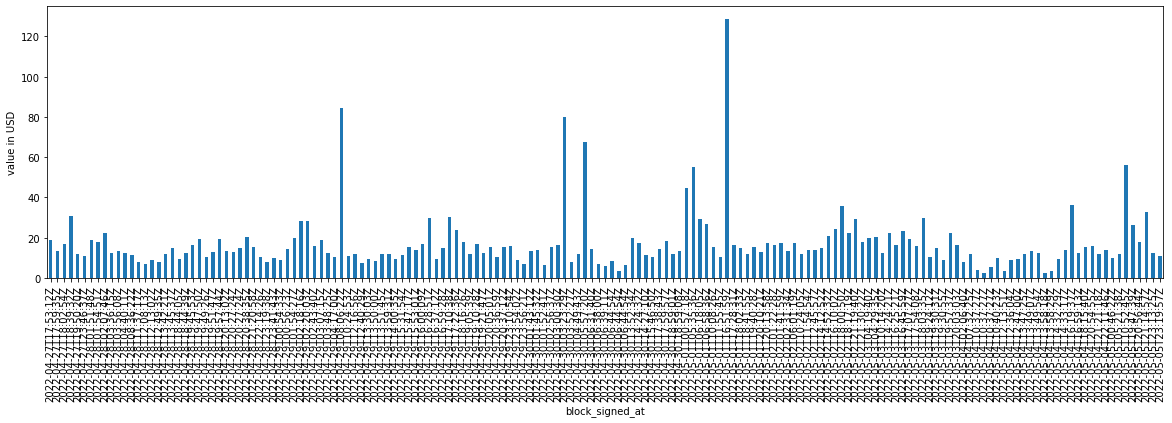

In [15]:
# Filter Through data for non null transactions
cryptopunks_fees = cryptopunks_sales_df['fees_paid'].astype(int)/10**18*eth_value

cryptopunks_fees.plot.bar(rot = 90, figsize = (20,5), ylabel = 'value in USD')

## 3. BAYC Daily Volume

In [16]:
# Create variables needed for owner data and add to url
BAYC_historical_url = url + chain_id + "/nft_market/collection" + BAYC_address + api_no_option

# Get request
BAYC_historical_json = requests.get(BAYC_historical_url).json()

# Convert historical json data to a dataframe and view data
BAYC_df = pd.DataFrame(BAYC_historical_json['data']['items'])

# Set index to date
BAYC_df = BAYC_df.set_index('opening_date')

# Create Volume dataframe
BAYC_vol_df = pd.DataFrame(BAYC_df, columns = ['volume_quote_day', 'unique_token_ids_sold_count_day']).sort_index()
BAYC_vol_df.head()

volume_quote_day  unique_token_ids_sold_count_day
opening_date                                                   
2021-04-30        8.241964e+02                                1
2021-05-01        1.737182e+06                             1635
2021-05-02        4.950946e+06                             1534
2021-05-03        3.948996e+06                              996
2021-05-04        1.388962e+06                              336

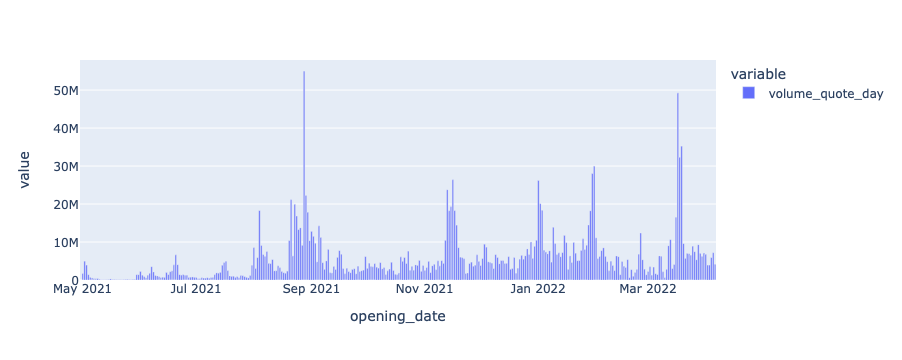

In [17]:
# Plot Volume quote per day
BAYC_volume = BAYC_vol_df['volume_quote_day'].astype(int)

# BAYC_volume.plot.bar(figsize = (20,4))
px.bar(BAYC_volume)

## 3a BAYC Historical Sales

In [18]:
# Quering the API for transaction data
BAYC_tx_url = url + chain_id + "/address" + BAYC_address + page_option + api_option 
BAYC_tx = requests.get(BAYC_tx_url).json()

# Convert transactions data to dataframe
BAYC_tx_df = pd.DataFrame(BAYC_tx['data']['items'], columns = ['to_address_label','fees_paid', 'value_quote','block_signed_at']).set_index('block_signed_at').sort_index()

BAYC_tx_df.head()

to_address_label         fees_paid  value_quote
block_signed_at                                                     
2022-05-02T19:47:04Z             None  8613275796346668          0.0
2022-05-02T19:47:57Z             None  5276925579476200          0.0
2022-05-02T20:00:13Z             None  8907165524740329          0.0
2022-05-02T20:01:18Z             None  3014418427194720          0.0
2022-05-02T20:03:22Z             None  3944454408836760          0.0

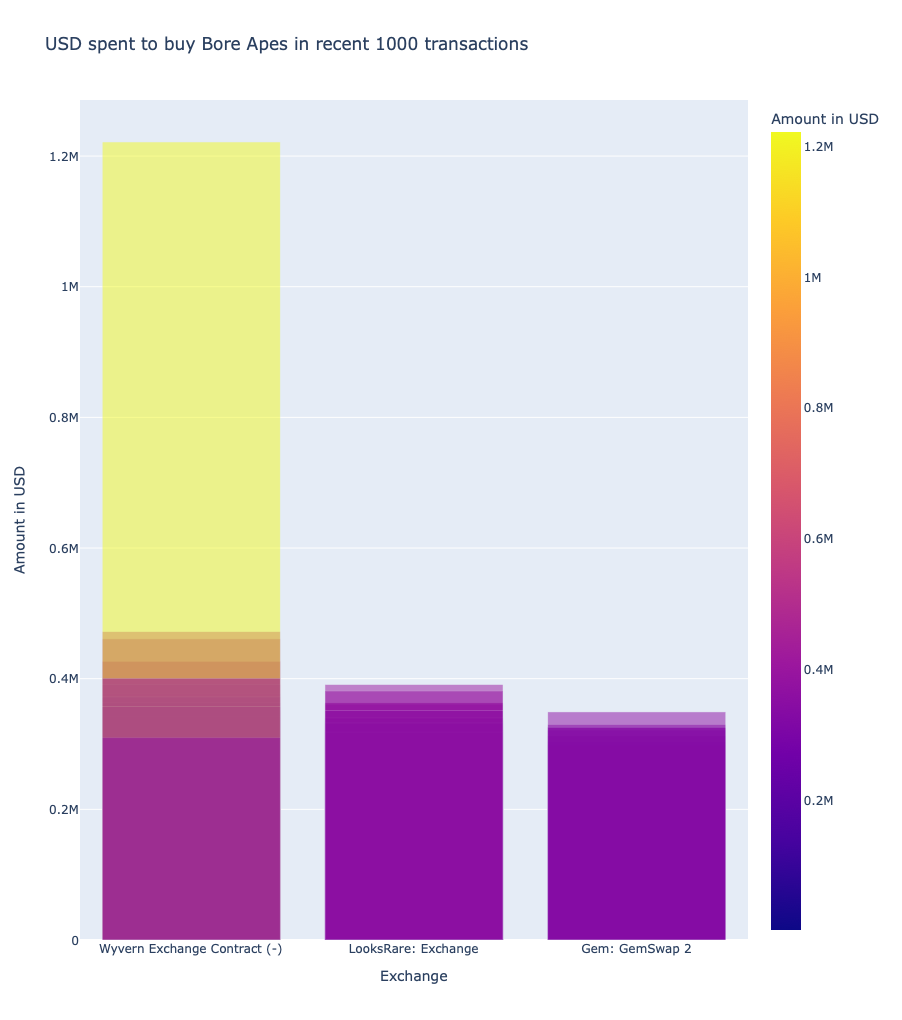

In [19]:
# Filter Through data for non null transactions
BAYC_sales_df = BAYC_tx_df[BAYC_tx_df['value_quote'] != 0]
BAYC_sales = BAYC_sales_df[BAYC_sales_df['to_address_label'].notnull()].dropna()

# Creating the plot using plotly express
BAYC_fig = px.bar(BAYC_sales, 
             x='to_address_label', 
             y= 'value_quote',
             color='value_quote',
             height=1020,
             width = 1000,
                  barmode = 'overlay',
                  labels={'value_quote':'Amount in USD', 'to_address_label': 'Exchange'},
             title='USD spent to buy Bore Apes in recent 1000 transactions'
            )
BAYC_fig.show()

## 3.b BAYC Fees paid

<AxesSubplot:xlabel='block_signed_at', ylabel='value in USD'>

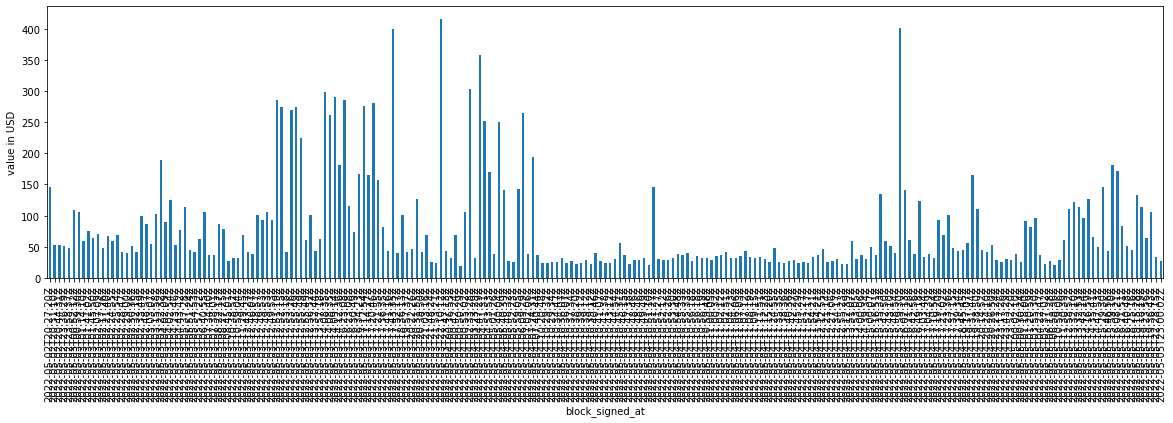

In [20]:
# Filter Through data for non null transactions
BAYC_fees = BAYC_sales_df['fees_paid'].astype(int)/10**18*eth_value

BAYC_fees.plot.bar(rot = 90, figsize = (20,5), ylabel = 'value in USD')

## Combine Total Sales

In [21]:
# Group by address label and sum the value
azuki_total = azuki_sales.groupby('to_address_label').sum()
cryptopunks_total = cryptopunks_sales.groupby('to_address_label').sum()
BAYC_total = BAYC_sales.groupby('to_address_label').sum()

In [22]:
# Combine and rename columns for our total sales data
combined_totals = pd.concat([azuki_total,cryptopunks_total,BAYC_total], axis=1)
combined_totals.columns = ['azuki_total', 'cryptopunks_total','BAYC_total']

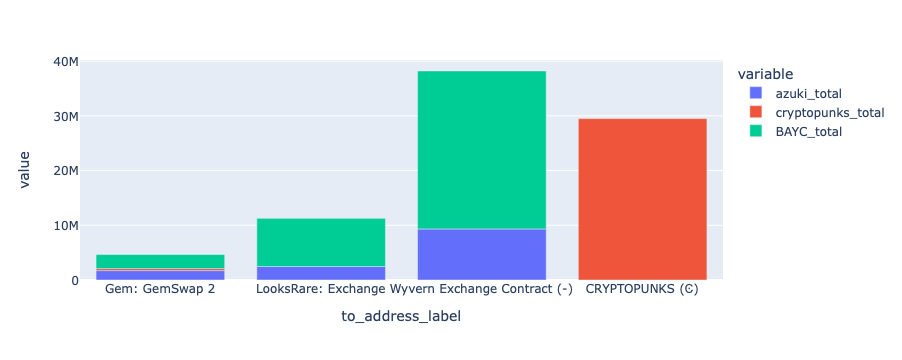

In [23]:
# Plot for combined figure
combined_total_fig = px.bar(combined_totals)


# Show Figure
combined_total_fig.show()

## Combine Total Fees

In [24]:
# Group by address label and sum the value
combined_totals

azuki_total  cryptopunks_total    BAYC_total
to_address_label                                                           
Gem: GemSwap 2                1.706096e+06       3.683260e+05  2.568193e+06
LooksRare: Exchange           2.453730e+06                NaN  8.814663e+06
Wyvern Exchange Contract (-)  9.326936e+06                NaN  2.886228e+07
CRYPTOPUNKS (Ͼ)                        NaN       2.948391e+07           NaN

In [25]:
# Combine and rename columns for our total sales data
azuki_usd_fees = azuki_sales['fees_paid'].astype(int)/10**18*eth_value
cryptopunks_usd_fees = cryptopunks_sales['fees_paid'].astype(int)/10**18*eth_value
BAYC_usd_fees = BAYC_sales['fees_paid'].astype(int)/10**18*eth_value

# Combine dataframe and drop nulls
combined_usd_fees = pd.concat([azuki_usd_fees.reset_index(drop=True),
                               cryptopunks_usd_fees.reset_index(drop=True),
                               BAYC_usd_fees.reset_index(drop=True)], 
                              axis=1
                             ).dropna()
combined_usd_fees.columns = ['azuki_fees', 'cryptopunks_fees','BAYC_fees']

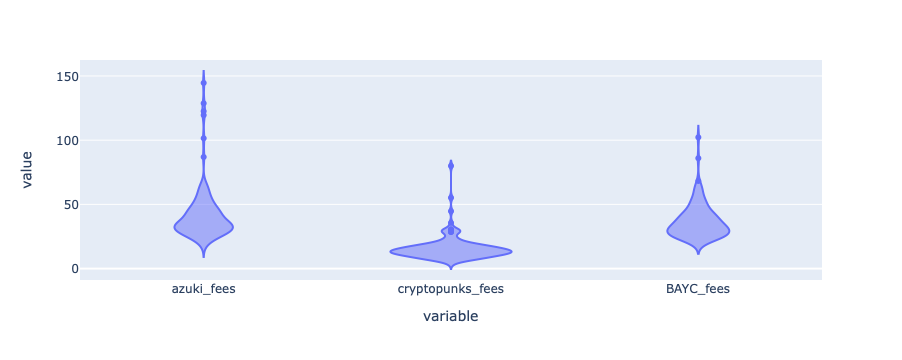

In [26]:
# Plot for combined figure
combined_fees_fig = px.violin(combined_usd_fees)

# Show Figure
combined_fees_fig.show()